In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
!wget 'https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx'

--2021-12-26 10:00:41--  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx
Resolving gtd.terrorismdata.com (gtd.terrorismdata.com)... 18.169.202.182
Connecting to gtd.terrorismdata.com (gtd.terrorismdata.com)|18.169.202.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99732895 (95M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘globalterrorismdb_0221dist.xlsx’

globalterrorismdb_0 100%[===================>]  95.11M  21.9MB/s    in 5.3s    

2021-12-26 10:00:47 (18.0 MB/s) - ‘globalterrorismdb_0221dist.xlsx’ saved [99732895/99732895]



In [3]:
terrorism = pd.read_excel('/content/globalterrorismdb_0221dist.xlsx')
#encoding='ISO-8859-1', low_memory=False)

In [4]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 207.2+ MB


In [5]:
 terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = terrorism[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [7]:
data.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,National,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [8]:
data.tail()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
201178,201912310028,2019,Iraq,Middle East & North Africa,Baghdad,Baghdad,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,Iraq,Unknown,0.0,0.0,Explosives,0.0,0.0
201179,201912310030,2019,Sudan,Sub-Saharan Africa,West Darfur,El Geneina,1,1,1,1,0,Unknown,Police,Sudan,Unknown,0.0,0.0,Unknown,2.0,1.0
201180,201912310031,2019,Sudan,Sub-Saharan Africa,West Darfur,El Geneina,1,1,1,1,0,Armed Assault,Government (General),Sudan,Unknown,0.0,0.0,Firearms,2.0,0.0
201181,201912310032,2019,India,South Asia,Jammu and Kashmir,Bagiot Dora,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,India,Unknown,0.0,0.0,Explosives,0.0,1.0
201182,201912310033,2019,China,East Asia,Hong Kong,Hong Kong,1,1,1,1,0,Facility/Infrastructure Attack,Government (General),Hong Kong,Unknown,0.0,0.0,Incendiary,0.0,0.0


In [9]:
print('Country with Higest Number of Terrerist Attacks: ', data['Country'].value_counts().index[0])

Country with Higest Number of Terrerist Attacks:  Iraq


In [10]:
data['Country'].value_counts()

Iraq                26755
Afghanistan         16313
Pakistan            15208
India               13477
Colombia             8742
                    ...  
Falkland Islands        1
South Vietnam           1
St. Lucia               1
International           1
North Korea             1
Name: Country, Length: 205, dtype: int64

In [11]:
print('Regions with the higest number of Terrorist Attacks: ', data['Region'].value_counts().index[0])

Regions with the higest number of Terrorist Attacks:  Middle East & North Africa


In [12]:
print('Maximum number if people were killed by a single Terrorist Attack are: ', data['Nkill'].max())

Maximum number if people were killed by a single Terrorist Attack are:  1570.0


In [13]:
data['Damage'] = data['Nkill']+data['Nwound']
data['Damage']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
201178    0.0
201179    3.0
201180    2.0
201181    1.0
201182    0.0
Name: Damage, Length: 201183, dtype: float64

In [14]:
data['Country']  = data['Country'].replace('South Veitnam', 'Veitnam', regex=True)
data['Weaptype']  = data['Weaptype'].replace('Vehicle.*', 'Vehicle', regex=True)
data['Attacktype']  = data['Attacktype'].replace('Hostage Taking.*', 'Hostage Taking', regex=True)

In [15]:
atk_filtered = data['Attacktype'].apply(lambda x:x if x in ['Bombing/Explosion','Armed Assault', 'Assassination', 
                                                            'Hostage Taking', 'Facility/Infrastructure Attack'] else 'others')

In [16]:
attack_type = atk_filtered.value_counts().tolist()

In [17]:
attack_type

[95402, 47419, 20897, 14322, 11636, 11507]

In [18]:
labels = ['Bombing/Explosion','Armed Assault', 'Assassination', 'Hostage Taking', 'Facility/Infrastructure Attack', 'others']
sizes = []
for i in attack_type:
  percent = (i*100/len(data['Attacktype']))
  sizes.append(percent)

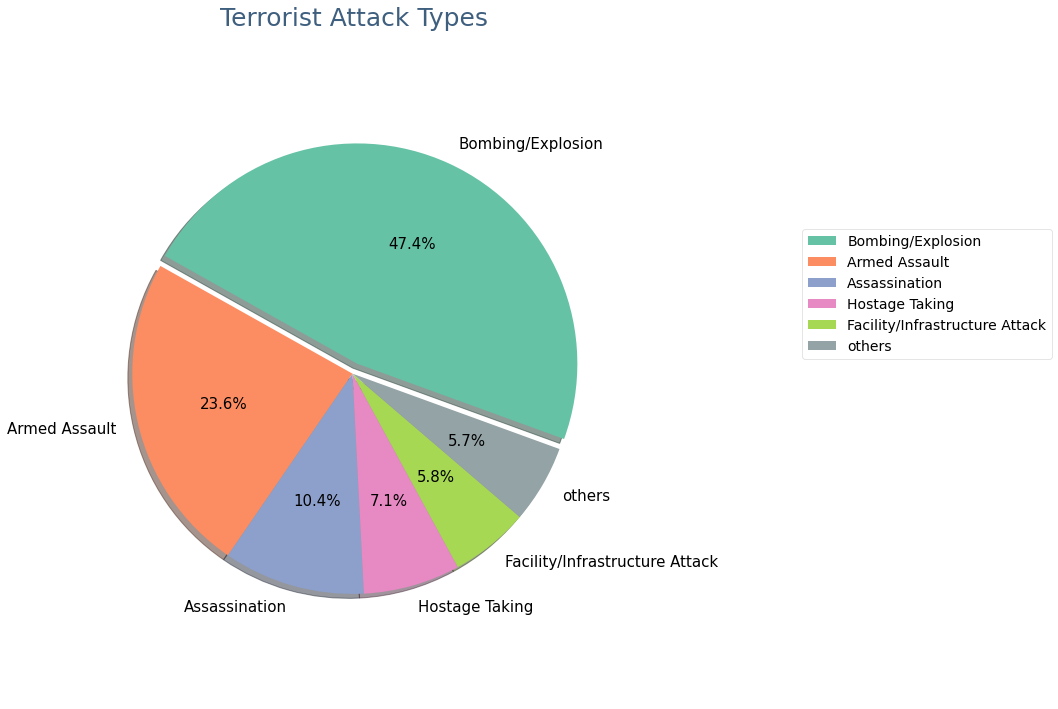

In [19]:
fig,ax=plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-20,
                                   shadow=True, explode=(0.05,0,0,0,0,0),
                                   colors=sns.color_palette('Set2',8)[:5]+
                                   [(0.58,0.64,0.65)],
                                   textprops={'fontsize':15, 'weight':'light', 'color':'k'})
ax.axis('equal')
plt.title('Terrorist Attack Types', fontsize=25, pad=-70,
          color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right', framealpha=0.5, bbox_to_anchor=(1.8,0.5,0.1,1), 
          prop={'size':14})
plt.show()

In [20]:
data['Attacktype'].value_counts()

Bombing/Explosion                 95402
Armed Assault                     47419
Assassination                     20897
Hostage Taking                    14322
Facility/Infrastructure Attack    11636
Unknown                            9590
Unarmed Assault                    1183
Hijacking                           734
Name: Attacktype, dtype: int64

In [21]:
data[['Attacktype', 'Damage']].groupby('Attacktype', as_index=False).sum().sort_values(by='Damage', ascending=False)

,Attacktype,Damage
2,Bombing/Explosion,547783.0
0,Armed Assault,232563.0
7,Unknown,52146.0
1,Assassination,40485.0
5,Hostage Taking,33571.0
4,Hijacking,26069.0
6,Unarmed Assault,15481.0
3,Facility/Infrastructure Attack,6980.0


In [22]:
cat = ['Bombing/Explosion','Armed Assault', 'Assassination', 'Hostage Taking', 'Facility/Infrastructure Attack']
color_cat = sns.color_palette('Set2', 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))
table1 = data[['Attacktype', 'Damage']].groupby('Attacktype', as_index=False).sum().sort_values(by='Damage', ascending=False)
table1 = table1.reset_index()
inci = [95402,47419,9590,20897,14322,734,1183,11636]
table1['Incidents'] = np.array(inci)
table1['Damage Rate'] = table1['Damage']/table1['Incidents']
table1

,index,Attacktype,Damage,Incidents,Damage Rate
0,2,Bombing/Explosion,547783.0,95402,5.741840
1,0,Armed Assault,232563.0,47419,4.904426
2,7,Unknown,52146.0,9590,5.437539
3,1,Assassination,40485.0,20897,1.937359
4,5,Hostage Taking,33571.0,14322,2.344016
5,4,Hijacking,26069.0,734,35.516349
6,6,Unarmed Assault,15481.0,1183,13.086221
7,3,Facility/Infrastructure Attack,6980.0,11636,0.599862


In [23]:
labels = table1['Attacktype'].tolist()
x = np.arange(len(labels))
dmg = table1['Damage'].tolist()
dmg

[547783.0, 232563.0, 52146.0, 40485.0, 33571.0, 26069.0, 15481.0, 6980.0]

In [24]:
gray = (0.5, 0.64, 0.65)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]
color_list

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5, 0.64, 0.65),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [25]:
d_rate = table1['Damage Rate'].tolist()

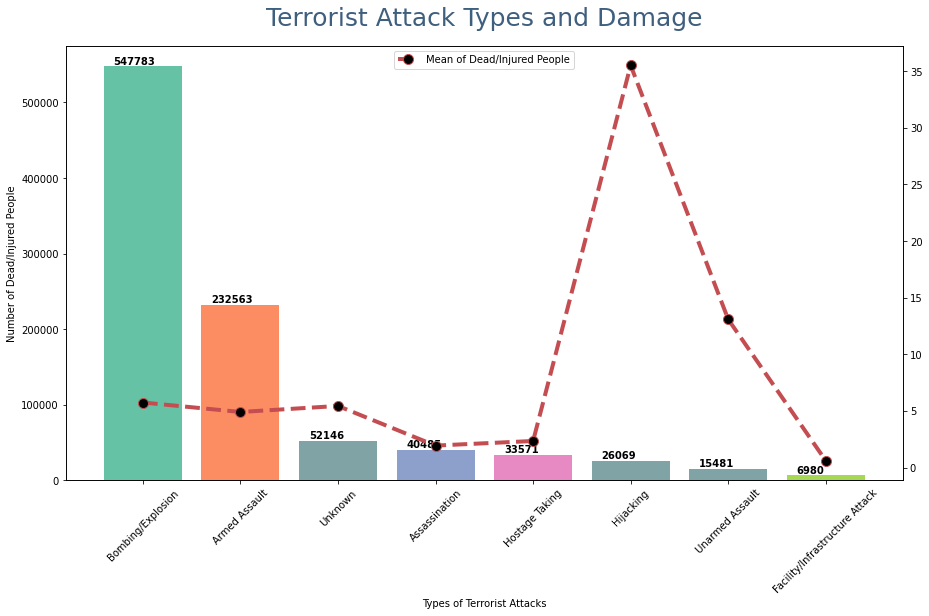

In [26]:
fig,ax1 = plt.subplots(figsize=(15,8))
#Bar Chart
ax1.bar(labels, dmg, color=color_list, align='center')
#Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(labels,d_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Terrorist Attack Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Types of Terrorist Attacks',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(labels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [27]:
table2 = data[['Weaptype', 'Damage']].groupby('Weaptype', as_index=False).sum().sort_values(by='Damage', ascending=False)
df_count = data['Weaptype'].value_counts()
df_count =  df_count.reindex(table2['Weaptype'].values)
df_count

Explosives            100333
Firearms               64923
Unknown                18462
Vehicle                  170
Melee                   4115
Chemical                 344
Incendiary             12445
Biological                36
Sabotage Equipment       175
Other                    134
Fake Weapons              33
Radiological              13
Name: Weaptype, dtype: int64

In [28]:
table2['WeapCount'] = df_count.values
table2['WeapCount']

2     100333
4      64923
10     18462
11       170
6       4115
1        344
5      12445
0         36
9        175
7        134
3         33
8         13
Name: WeapCount, dtype: int64

In [29]:
table2['Weap_damage_rate'] = table2['Damage']/table2['WeapCount']
table2['Weap_damage_rate']

2       5.742368
4       3.805693
10      3.488896
11    151.623529
6       3.789550
1      43.194767
5       0.784331
0      22.611111
9       2.057143
7       2.052239
3       0.030303
8       0.000000
Name: Weap_damage_rate, dtype: float64

In [30]:
table2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,576149.0,100333,5.742368
4,Firearms,247077.0,64923,3.805693
10,Unknown,64412.0,18462,3.488896
11,Vehicle,25776.0,170,151.623529
6,Melee,15594.0,4115,3.789550
1,Chemical,14859.0,344,43.194767
5,Incendiary,9761.0,12445,0.784331
0,Biological,814.0,36,22.611111
9,Sabotage Equipment,360.0,175,2.057143
7,Other,275.0,134,2.052239


In [31]:
weaplabels = table2['Weaptype'].tolist()
y = np.arange(len(weaplabels))
weapdmg = table2['Damage'].tolist()
weapdmg

[576149.0,
 247077.0,
 64412.0,
 25776.0,
 15594.0,
 14859.0,
 9761.0,
 814.0,
 360.0,
 275.0,
 1.0,
 0.0]

In [32]:
wgray = (0.5, 0.64, 0.65)
w_cat = ['Explosives', 'Firearms', 'Unkown', 'Incendiary']
wcolorcat = sns.color_palette('Set2', 8)[:4:1]
wcolor_cat_dict = dict(zip(w_cat, wcolorcat))
wcolor_list = [wcolor_cat_dict[ter_type] if ter_type in wcolor_cat_dict.keys() else wgray for ter_type in weaplabels]
w_rate = table2['Weap_damage_rate'].tolist()

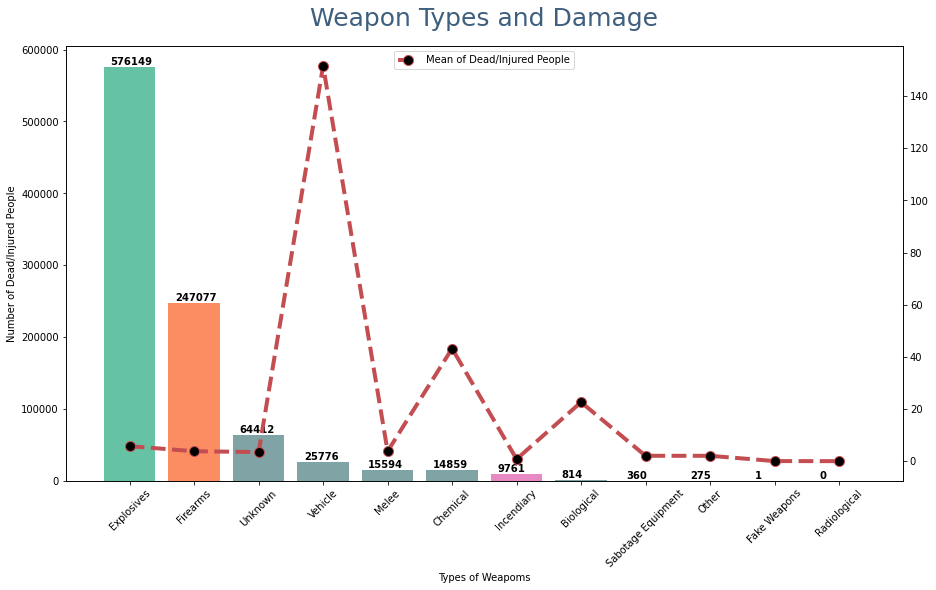

In [33]:
fig,ax1 = plt.subplots(figsize=(15,8))
#Bar Chart
ax1.bar(weaplabels, weapdmg, color=wcolor_list, align='center')
#Number in bar chart
for i,v in enumerate(weapdmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(weaplabels,w_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Weapon Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Types of Weapoms',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(weaplabels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [34]:
#Choose colum Country and Damage from Data
country_damage = data[data['Year']>1999][['Country', 'Damage']].groupby('Country', as_index=False).sum()
country_damage

,Country,Damage
0,Afghanistan,110175.0
1,Albania,3.0
2,Algeria,6753.0
3,Angola,1779.0
4,Argentina,11.0
...,...,...
165,Western Sahara,3.0
166,Yemen,21496.0
167,Yugoslavia,30.0
168,Zambia,2.0


In [35]:
data_paint = country_damage.sort_values(by='Damage', ascending=False).head(10)
data_paint

,Country,Damage
70,Iraq,207041.0
0,Afghanistan,110175.0
113,Pakistan,58152.0
66,India,29106.0
159,United States,27237.0
111,Nigeria,25345.0
145,Syria,24983.0
166,Yemen,21496.0
134,Somalia,19364.0
118,Philippines,13706.0


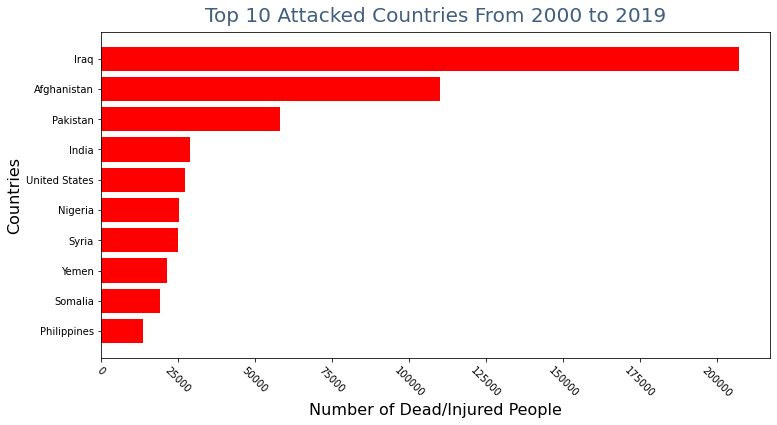

In [36]:
fig,ax = plt.subplots(figsize=(12,6))
ax.barh(data_paint['Country'][::-1], data_paint['Damage'][::-1], color='red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number of Dead/Injured People', size=16)
plt.title('Top 10 Attacked Countries From 2000 to 2019', fontsize=20, pad=10, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

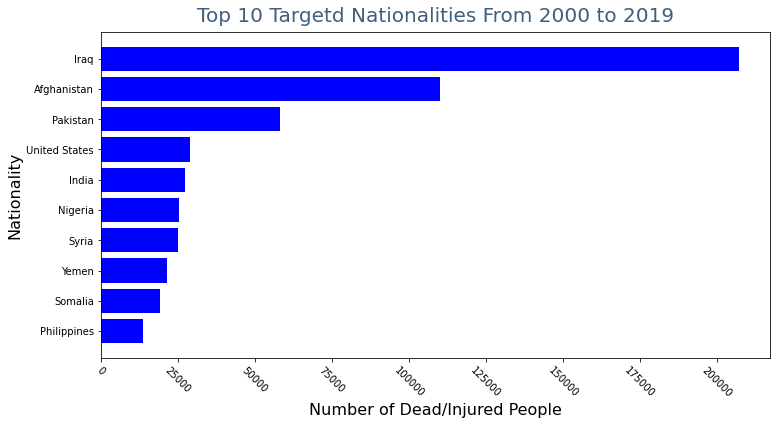

In [37]:
#Choose colum Country and Damage from Data
natly_dmg = data[data['Year']>1999][['Natlty1', 'Damage']].groupby('Natlty1', as_index=False).sum()
data_paint_natly = natly_dmg.sort_values(by='Damage', ascending=False).head(10)

fig,ax = plt.subplots(figsize=(12,6))
ax.barh(data_paint_natly['Natlty1'][::-1], data_paint['Damage'][::-1], color='blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality', size=16)
ax.set_xlabel('Number of Dead/Injured People', size=16)
plt.title('Top 10 Targetd Nationalities From 2000 to 2019', fontsize=20, pad=10, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [38]:
country_damage[country_damage['Damage']==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
35,Cyprus,0.0
65,Iceland,0.0
89,Lithuania,0.0
107,New Caledonia,0.0
120,Portugal,0.0
132,Slovenia,0.0
142,Swaziland,0.0
150,Togo,0.0


In [39]:
len(country_damage[country_damage['Damage']==0])

10

In [40]:
def country_nationality(n):
  '''Function to draw the bar charts of top 10
  Attacked Countries and Top 10 Targeted Nationalities'''
  #Filter data and choose top 10 Attacked Countries
  top10_bad = data[data['Year']==n][['Country', 'Damage']].groupby('Country', as_index=False).sum()
  data_paint = top10_bad.sort_values(by='Damage', ascending=False).head(10)
  fig,ax = plt.subplots(1,2,figsize=(16,4))
  ax[0].barh(data_paint['Country'][::-1], data_paint['Damage'][::-1], 
             color=['red', 'green', '#344650', '#df2029', '#FFFC00', '#E4405F',
                    '#3B5999', '#00c300', '#ff0084'])
  ax[0].set_ylabel('Countries', size=16)
  ax[0].set_xlabel('Number of Dead/Injured People', size=16)
  ax[0].set_title('Top 10 Attacked Countries %d' %n, fontsize=15, pad=10, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
  
  plt.subplots_adjust(wspace=0.3)
  #Choose colum Country and Damage from Data
  natly_dmg = data[data['Year']>1999][['Natlty1', 'Damage']].groupby('Natlty1', as_index=False).sum()
  data_paint_natly = natly_dmg.sort_values(by='Damage', ascending=False).head(10)
  ax[1].barh(data_paint_natly['Natlty1'][::-1], data_paint['Damage'][::-1], color='blue')
  ax[1].set_ylabel('Nationality', size=16)
  ax[1].set_xlabel('Number of Dead/Injured People', size=16)
  ax[1].set_title('Top 10 Targeted Nationalities %d' %n, fontsize=20, pad=10, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
  
  for ax in fig.axes:
    plt.sca(ax)
  plt.show()

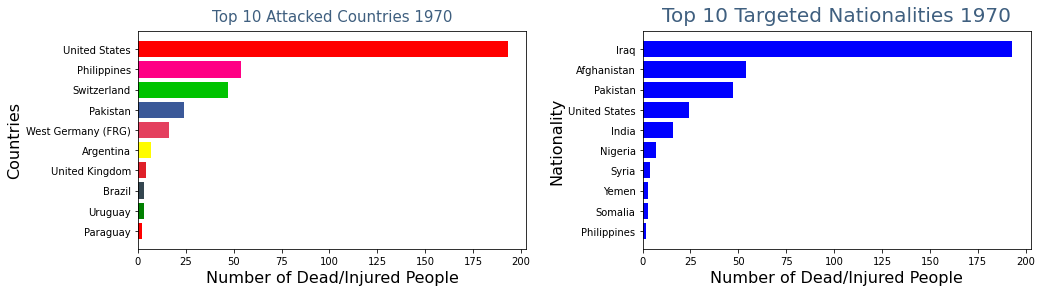

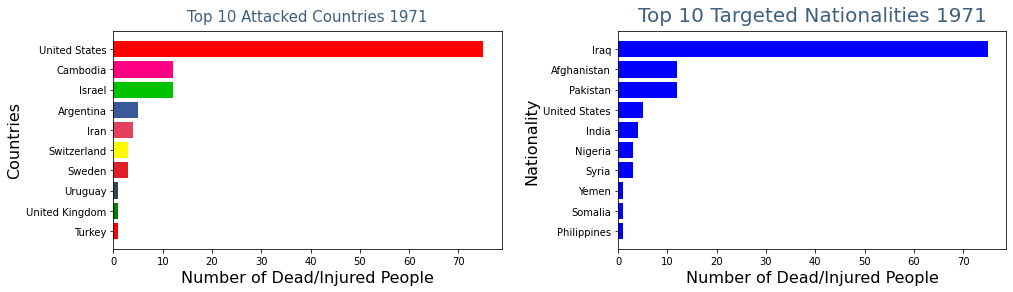

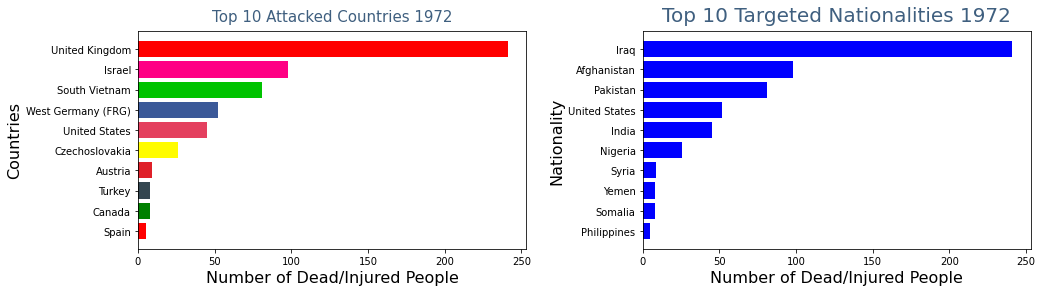

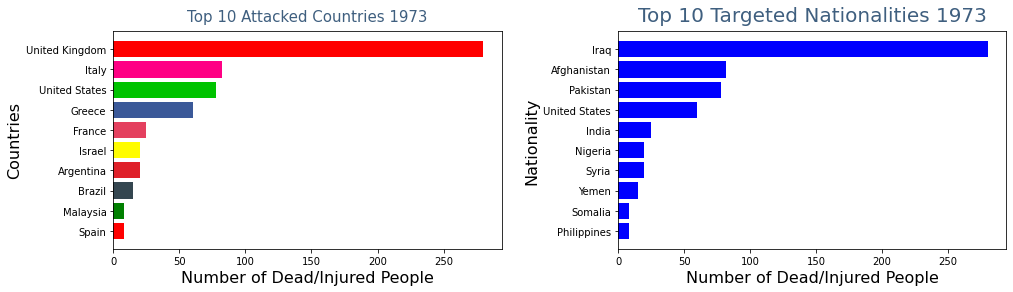

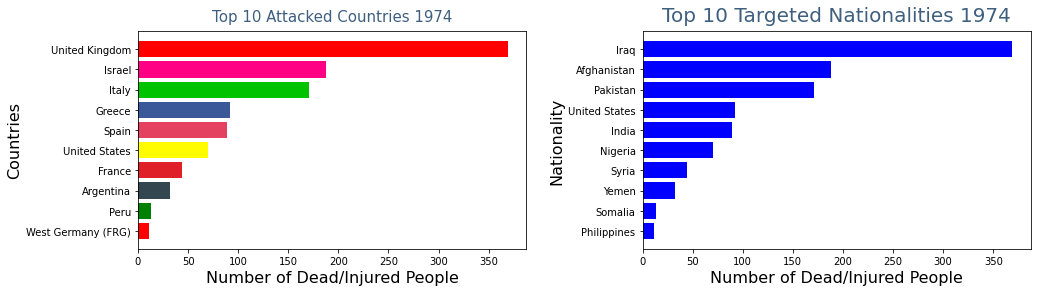

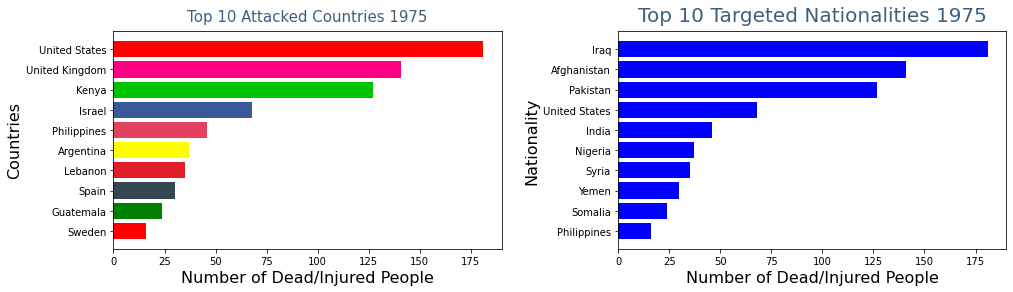

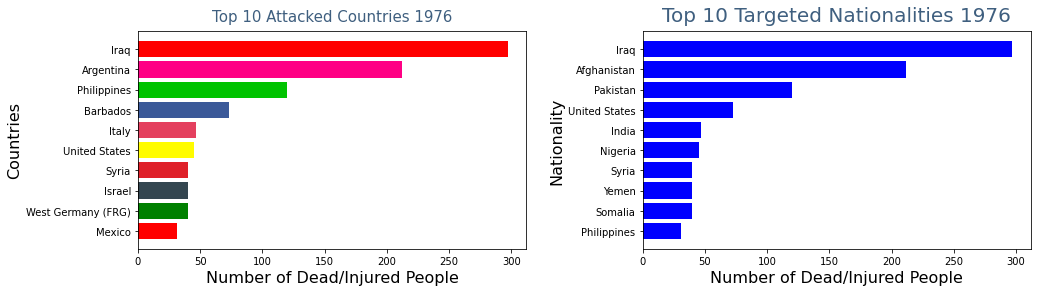

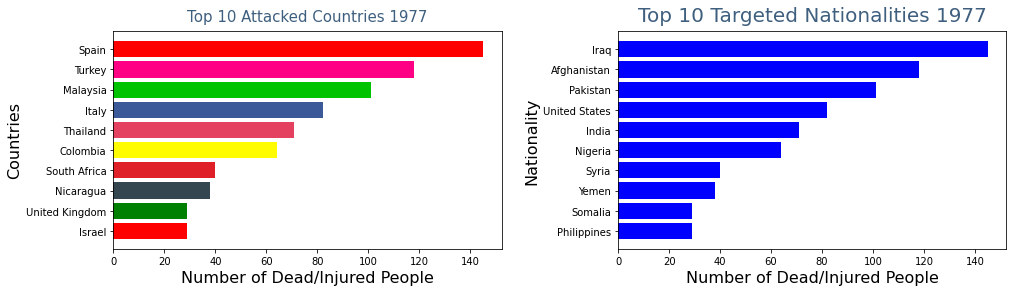

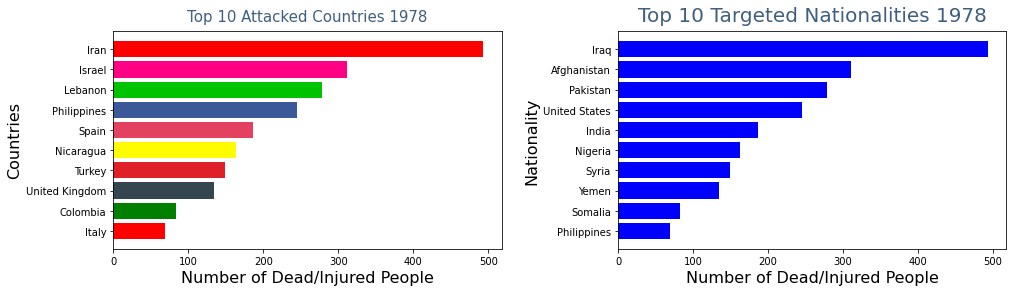

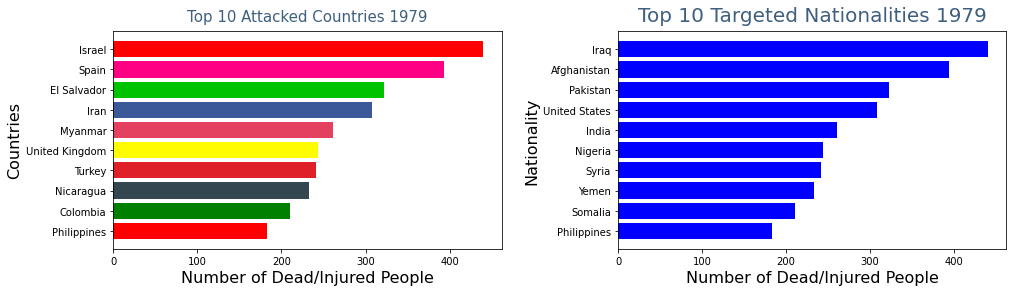

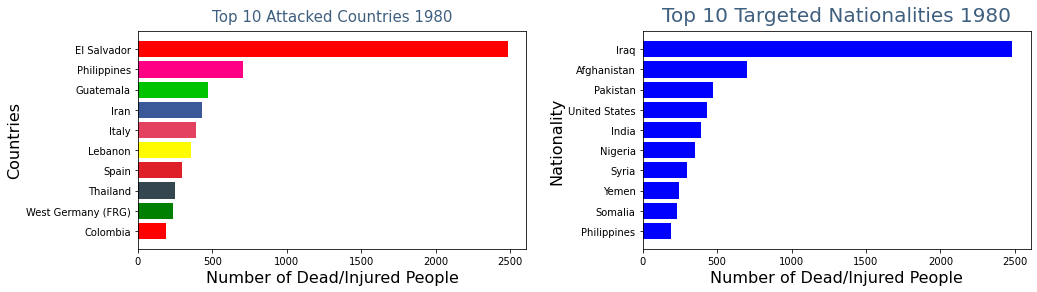

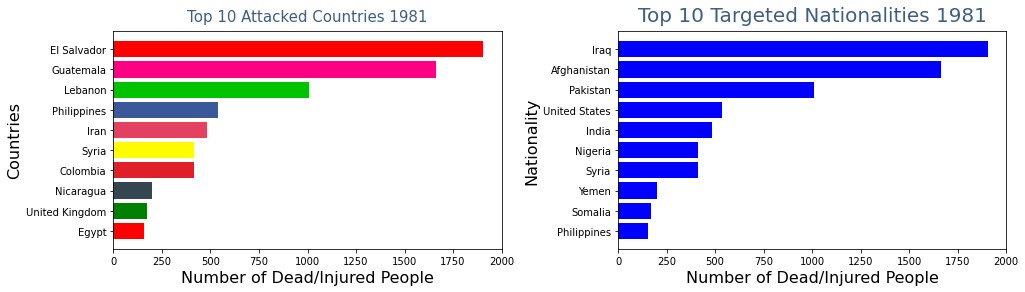

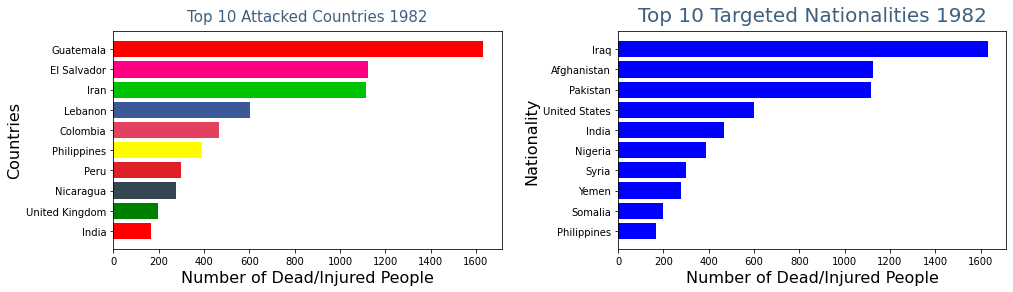

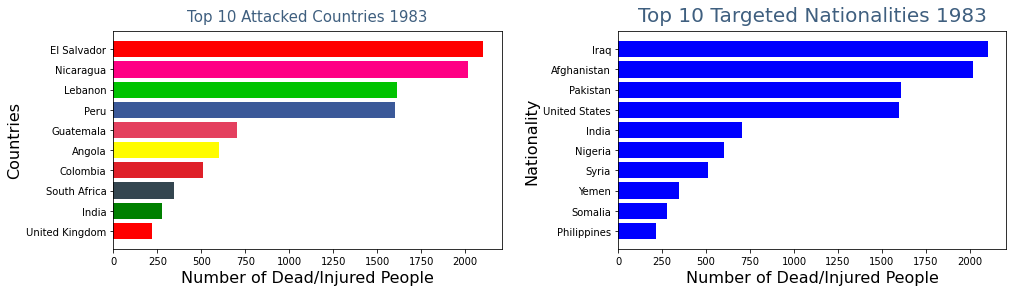

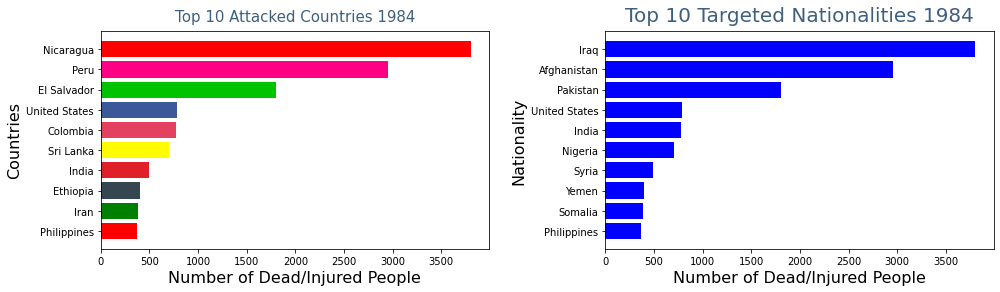

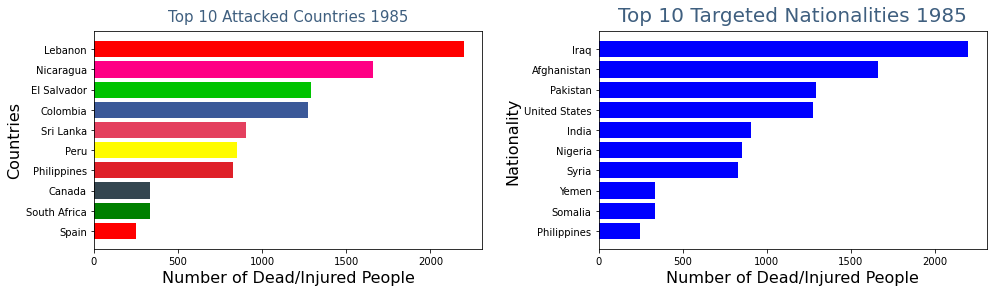

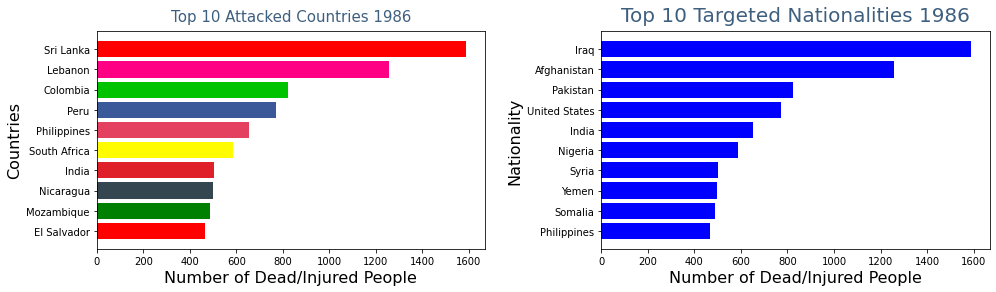

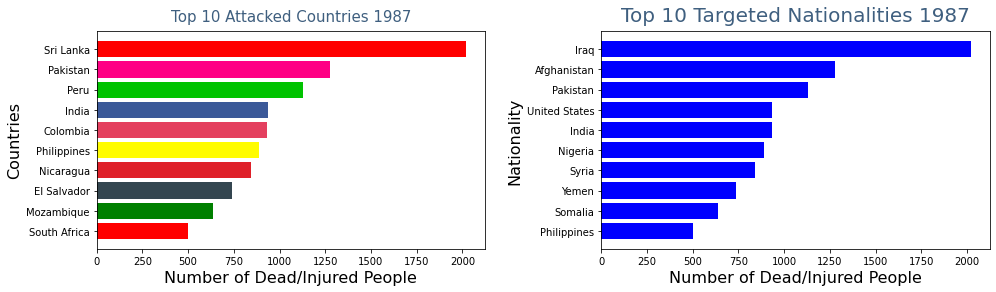

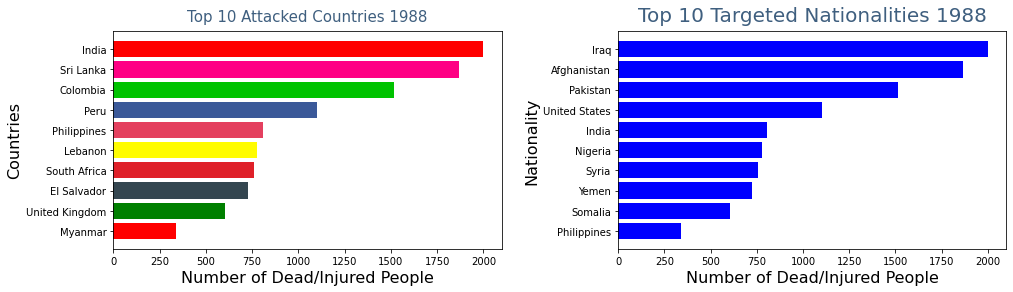

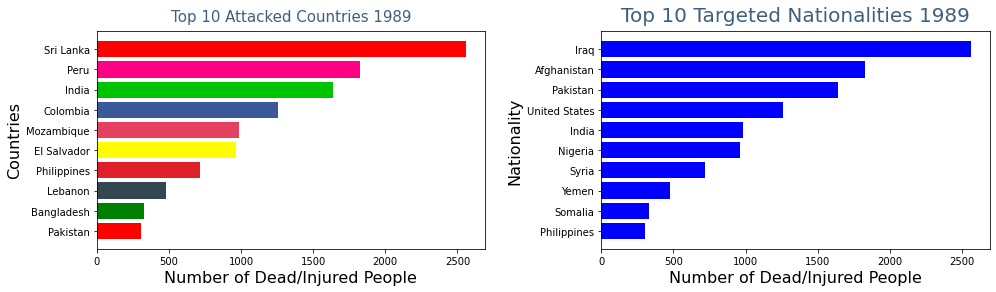

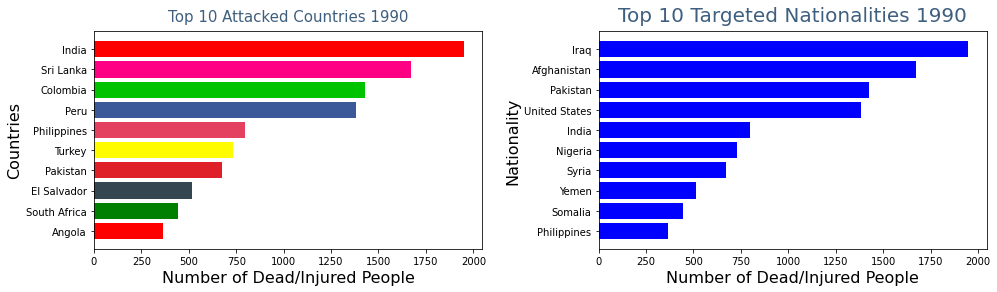

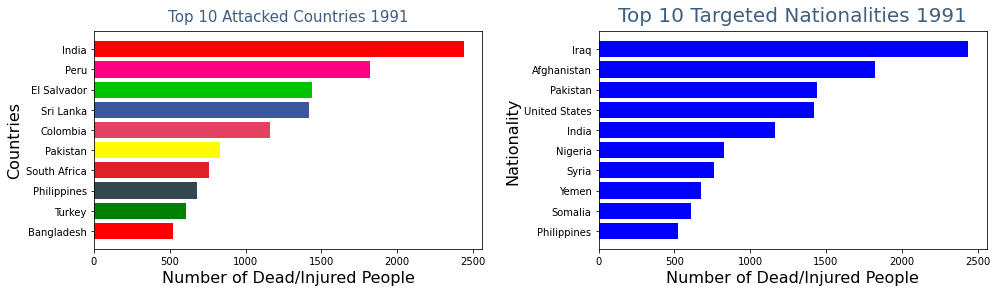

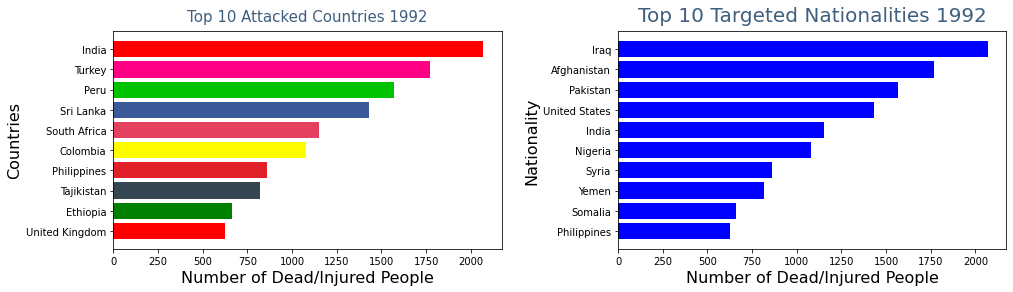

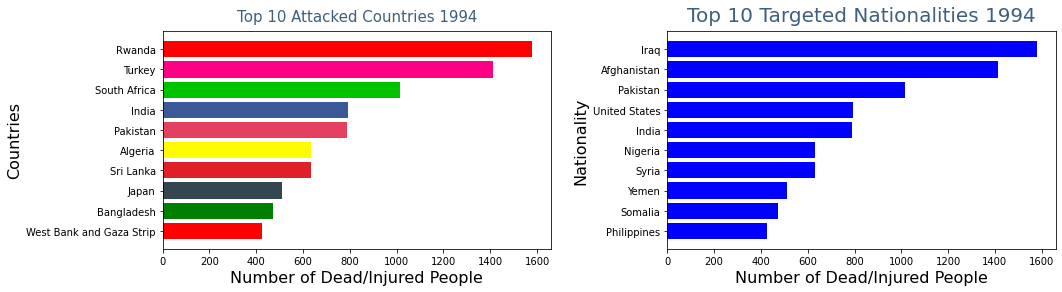

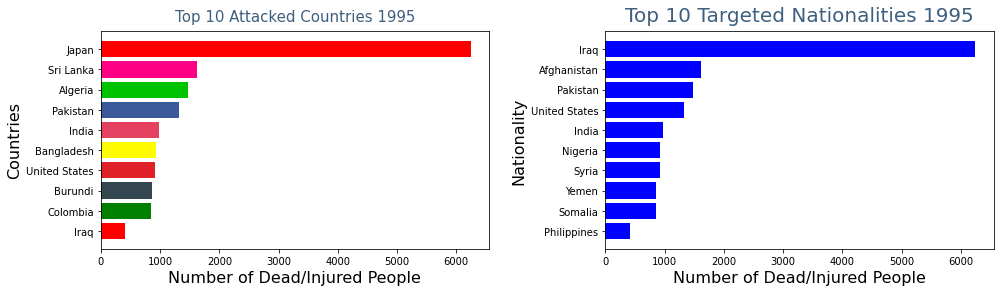

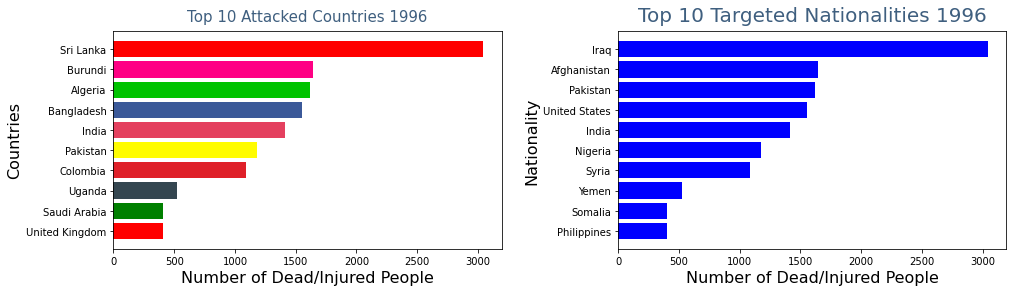

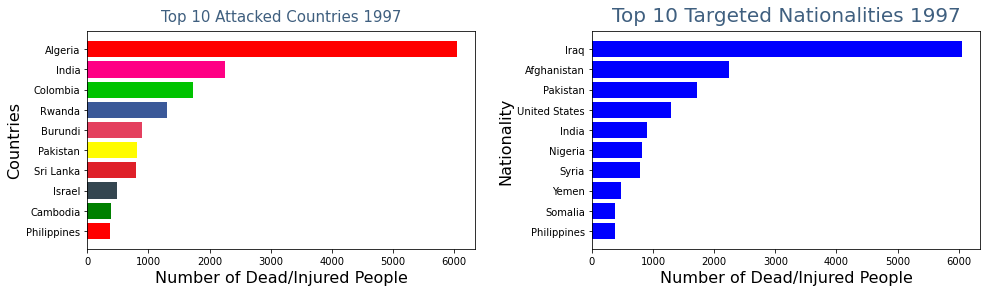

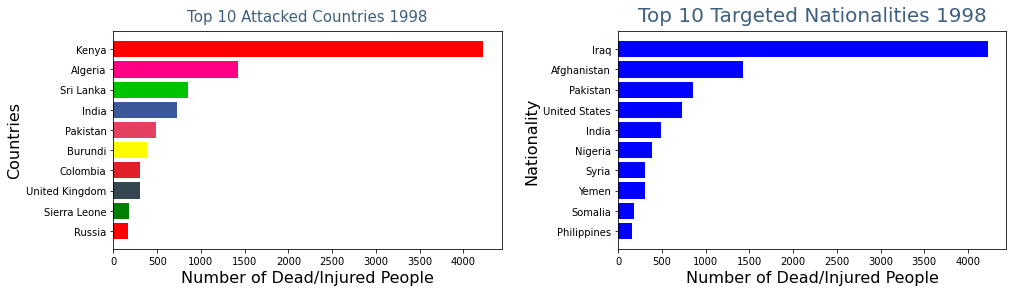

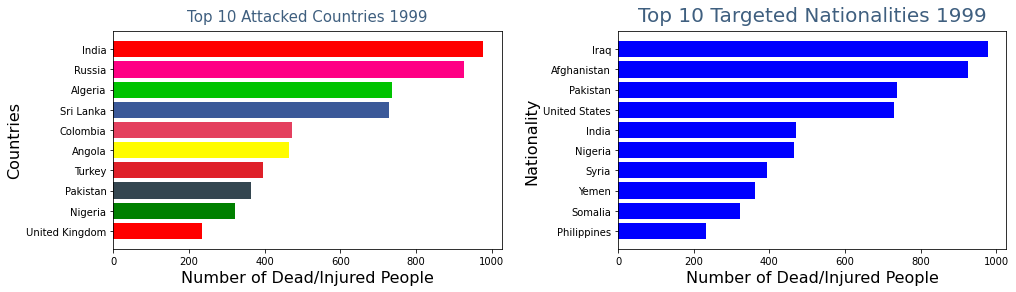

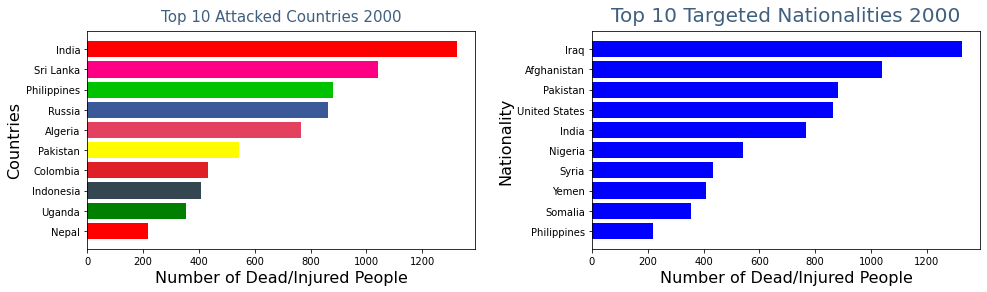

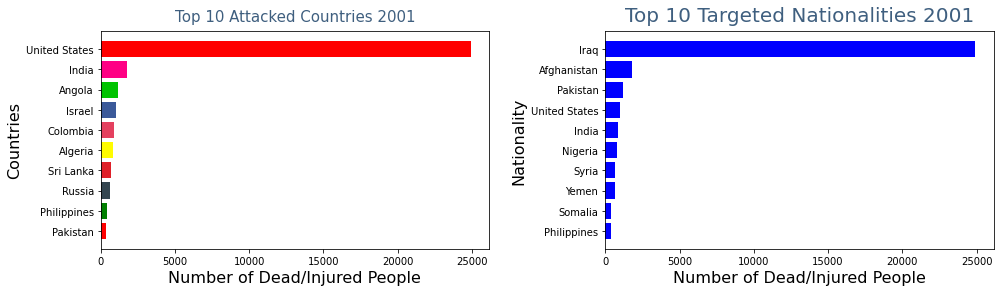

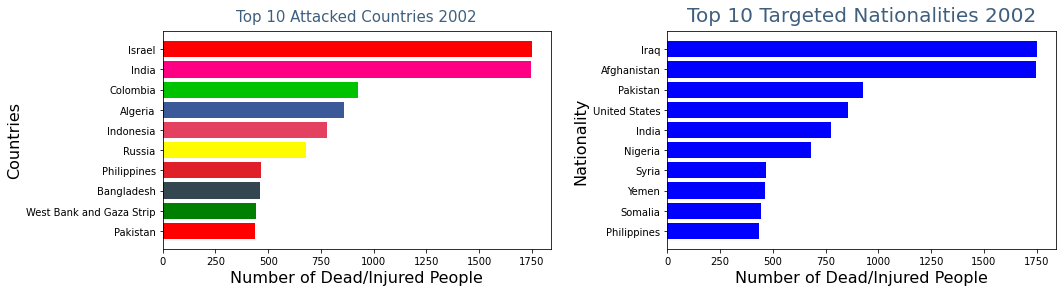

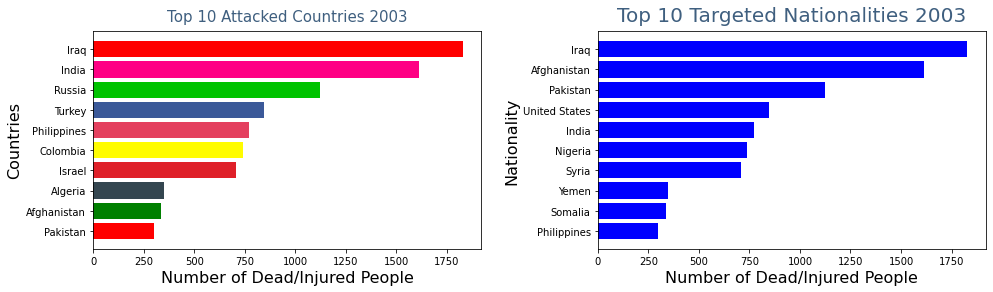

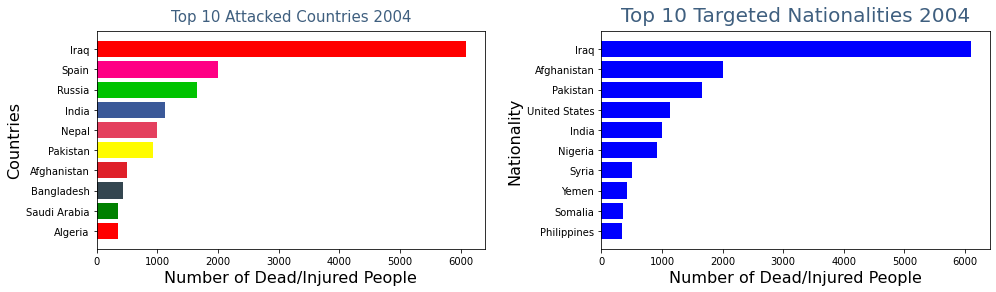

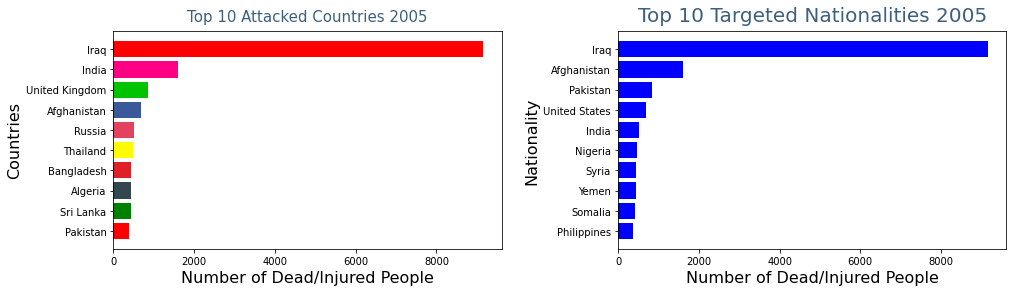

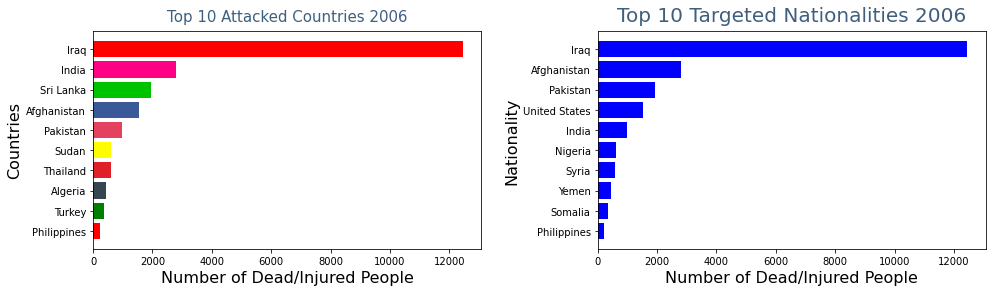

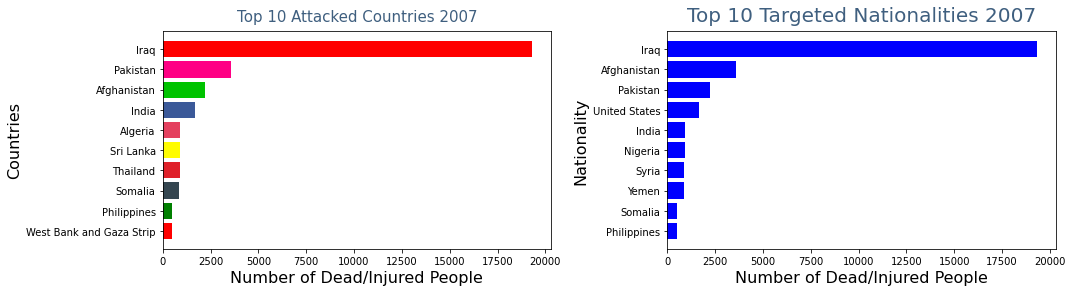

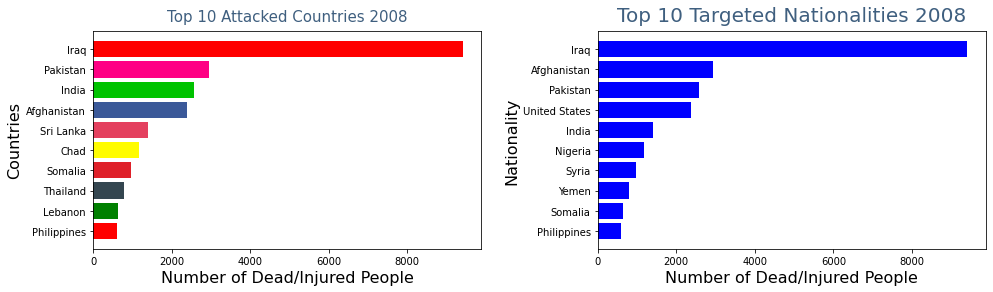

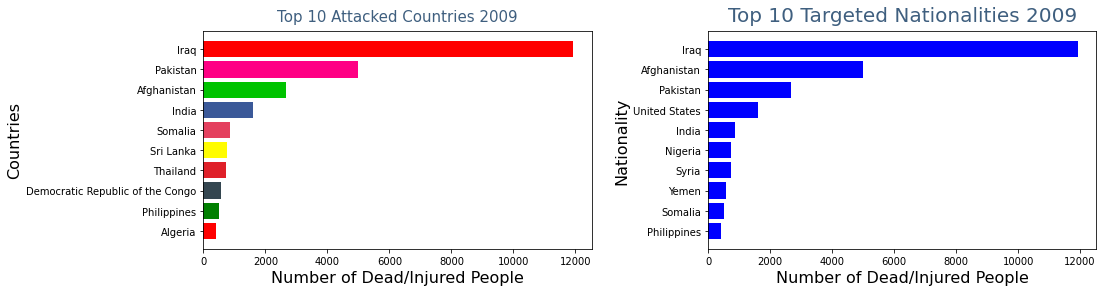

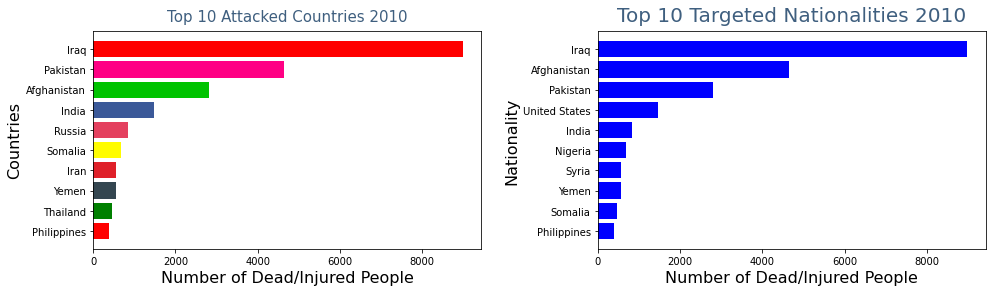

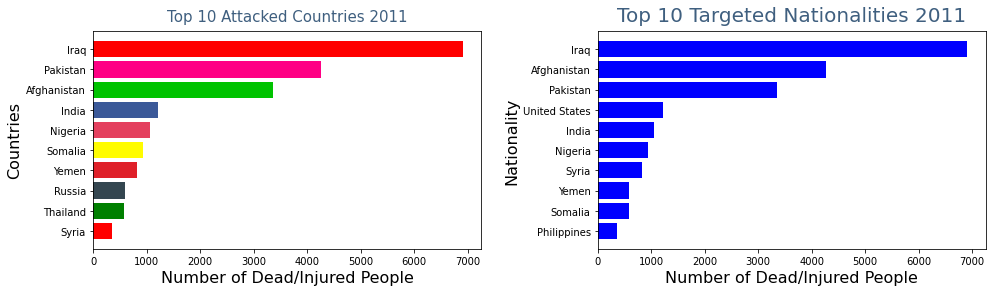

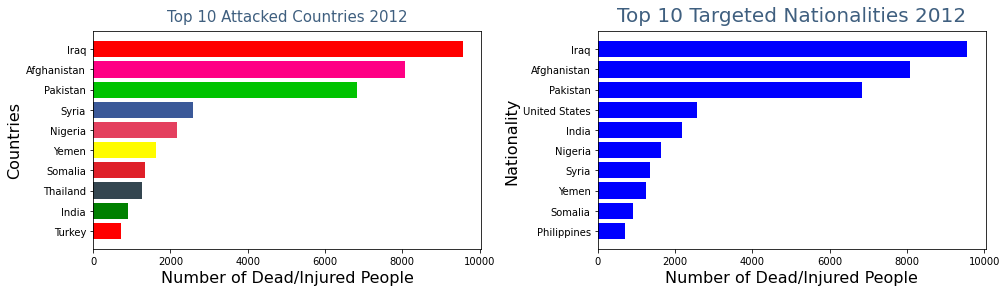

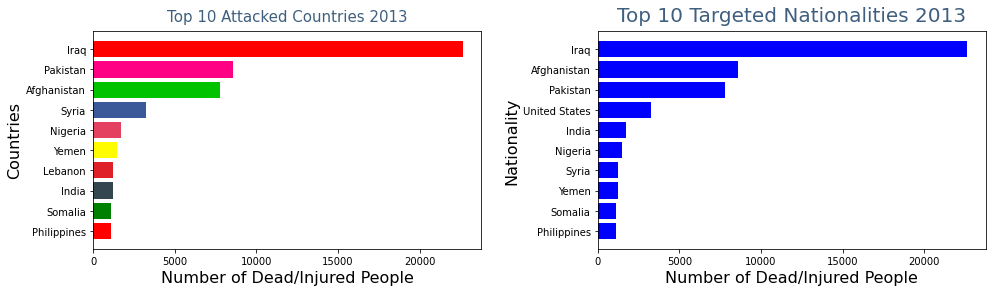

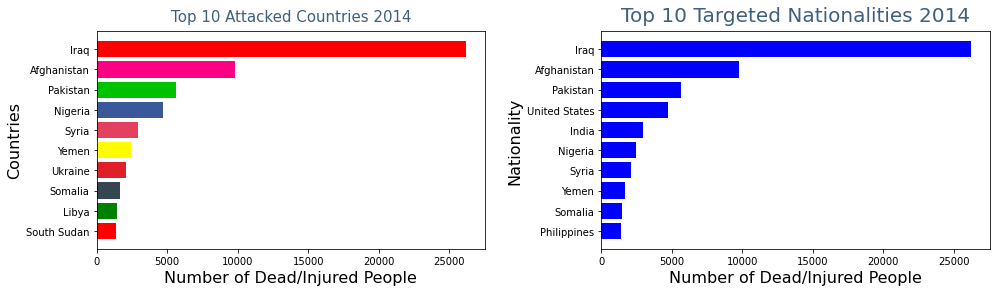

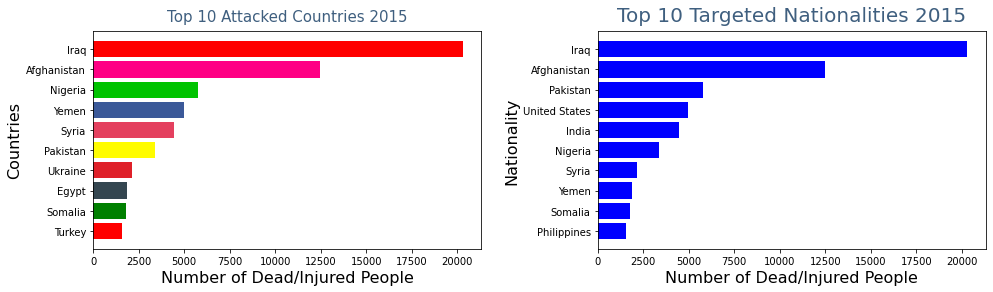

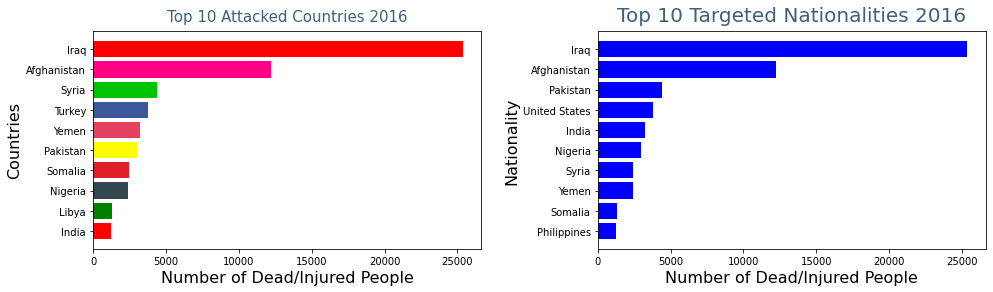

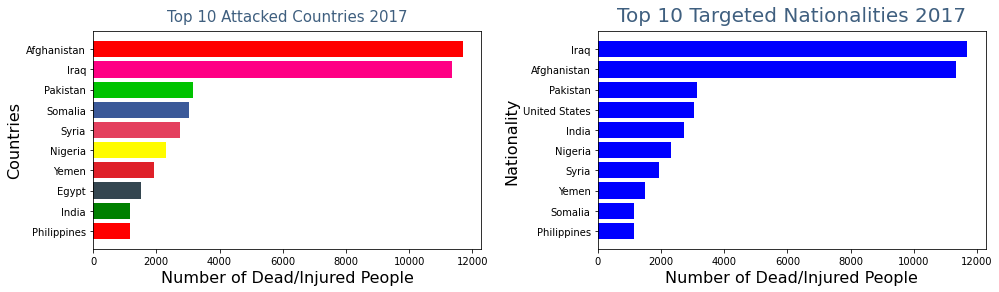

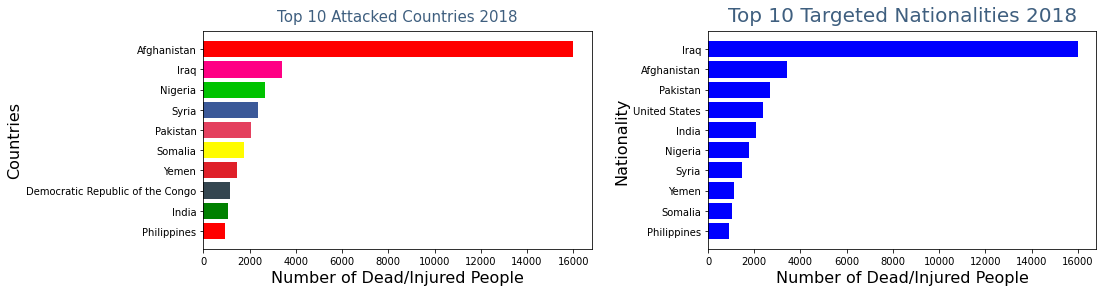

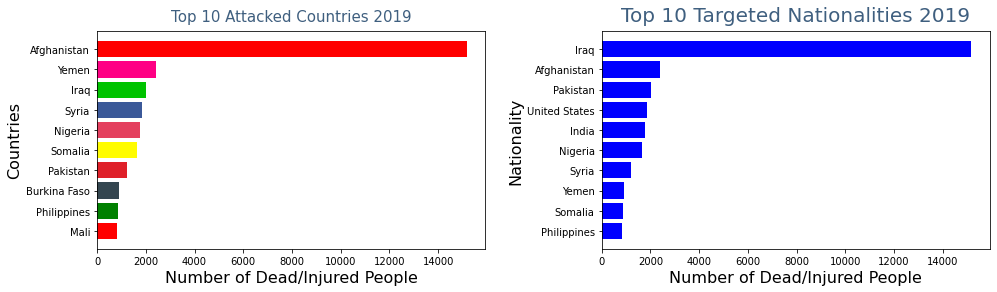

In [41]:
list_year = []
for year in range(1970,1993): list_year.append(year)
for year in range(1994,2020): list_year.append(year)
for year in list_year:
  country_nationality(year)


In [42]:
def country_nationality_year():
    ''' Function to paint chart with specific input year'''
    # Input year. Try if in list year
    try:
        year=int(input('Input the year you want to see chart! (1970-2011): '))
        if year==1993:
            print('Sorry, No Terrorism Data in 1993')
            year=int(input('Input the year you want to see chart! (1970-2011): '))
        while year not in list_year:
            print('Please input the year from 1970 to 2011')
            year=int(input('Input the year you want to see chart! (1970-2011): '))
    except (ValueError,ZeroDivisionError) as ex:
        print('Wrong Type, Input Again: ')
        country_nationality_year()
    else:
        country_nationality(year)

Input the year you want to see chart! (1970-2011): 1998


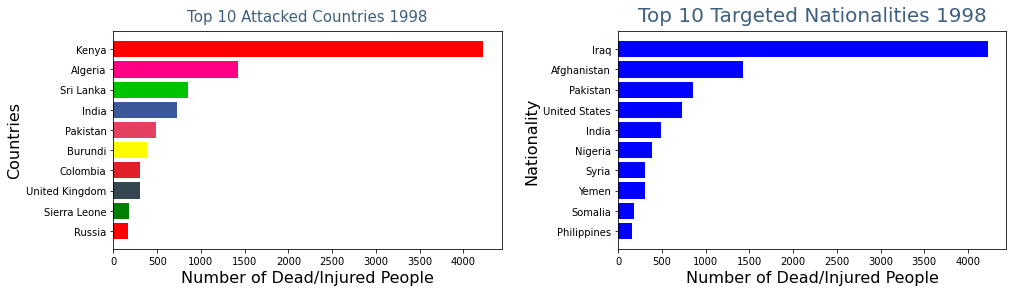

In [43]:
country_nationality_year()